# Tarea - Ajuste de curvas

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

len(data)

27

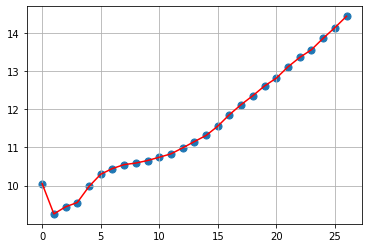

In [3]:
#Primero creamos una gráfica para visualizar los datos
m = 27

x = np.linspace(0, 26, m )
y = data #Como data es array, y un array corresponde a un lista, se toma el array como y para llenar los datos

plt.figure()
plt.scatter(x, y, s=50)
plt.plot(x, y, "r")
plt.grid()


In [4]:
import scipy.optimize as opt

In [5]:
def funcion_de_costo_1(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]


In [6]:
#Costos tomando en cuenta solo hasta x**1
ones = np.ones ([m, 1])
x_1 = np.reshape(x, [m, -1])

X = np.hstack((ones, x_1))
X

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 20.],
       [ 1., 21.],
       [ 1., 22.],
       [ 1., 23.],
       [ 1., 24.],
       [ 1., 25.],
       [ 1., 26.]])

In [7]:
#Acompañamos las beta's con las x y el resto de la función
beta_inicial = np.random.rand(2)
y = np.reshape(y, [m, -1])


In [8]:
funcion_de_costo_1(beta_inicial, X, y)


738.6115618011044

In [9]:
#Encontramos el minimo
solucion = opt.minimize(funcion_de_costo_1, beta_inicial, args=(X, y))
solucion

      fun: 2.3704889518157533
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([1.28149986e-06, 3.54647636e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([9.11567641, 0.18667055])

In [10]:
#Se encuentra la respectiva predicción
y_pred_a = X @ solucion.x
y_pred_a

array([ 9.11567641,  9.30234696,  9.48901751,  9.67568806,  9.86235861,
       10.04902916, 10.23569971, 10.42237027, 10.60904082, 10.79571137,
       10.98238192, 11.16905247, 11.35572302, 11.54239357, 11.72906412,
       11.91573467, 12.10240523, 12.28907578, 12.47574633, 12.66241688,
       12.84908743, 13.03575798, 13.22242853, 13.40909908, 13.59576963,
       13.78244019, 13.96911074])

In [11]:
#Se repiten los pasos anteriores, solo que ahora se tomará hasta x**2
def funcion_de_costo_2(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]




In [12]:
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])

X = np.hstack((ones, x_1, x_2))
X

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  20., 400.],
       [  1.,  21., 441.],
       [  1.,  22., 484.],
       [  1.,  23., 529.],
       [  1.,  24., 576.],
       [  1.,  25., 625.],
       [  1.,  26., 676.]])

In [13]:
beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])


In [14]:
funcion_de_costo_2(beta_inicial, X, y)


543570.3266114416

In [15]:
solucion = opt.minimize(funcion_de_costo_2, beta_inicial, args=(X,y))
solucion

      fun: 0.8443845194155863
 hess_inv: array([[ 1.44225506e-01, -2.17569785e-02,  6.84181711e-04],
       [-2.17569785e-02,  4.57454418e-03, -1.64203611e-04],
       [ 6.84181711e-04, -1.64203611e-04,  6.31552349e-06]])
      jac: array([2.23517418e-07, 3.03238630e-06, 1.37835741e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([9.59128641e+00, 7.25241365e-02, 4.39024687e-03])

In [16]:
y_pred_b = X @ solucion.x
y_pred_b

array([ 9.59128641,  9.6682008 ,  9.75389567,  9.84837104,  9.95162691,
       10.06366327, 10.18448012, 10.31407746, 10.4524553 , 10.59961364,
       10.75555246, 10.92027179, 11.0937716 , 11.27605191, 11.46711271,
       11.66695401, 11.8755758 , 12.09297808, 12.31916086, 12.55412413,
       12.79786789, 13.05039215, 13.3116969 , 13.58178215, 13.86064789,
       14.14829412, 14.44472085])

In [17]:
#Repetimos el mismo proceso hasta llegar a x**3
def funcion_de_costo_3(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]


In [18]:
ones = np.ones ([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])

X = np.hstack((ones, x_1, x_2, x_3))
X

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03],
       [1.0000e+00, 1.1000e+01, 1.2100e+02, 1.3310e+03],
       [1.0000e+00, 1.2000e+01, 1.4400e+02, 1.7280e+03],
       [1.0000e+00, 1.3000e+01, 1.6900e+02, 2.1970e+03],
       [1.0000e+00, 1.4000e+01, 1.9600e+02, 2.7440e+03],
       [1.0000e+00, 1.5000e+01, 2.2500e+02, 3.3750e+03],
       [1.0000e+00, 1.6000e+01, 2.5600e+02, 4.0960e+03],
       [1.0000e+00, 1.7000e+01,

In [19]:
beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])


In [20]:
funcion_de_costo_3(beta_inicial, X, y)


645317567.8564472

In [21]:
solucion = opt.minimize(funcion_de_costo_3, beta_inicial, args=(X, y))
solucion

      fun: 0.8404346758290193
 hess_inv: array([[ 2.27239551e-01, -6.41153948e-02,  4.83488035e-03,
        -1.06428170e-04],
       [-6.41153948e-02,  2.61882939e-02, -2.28213559e-03,
         5.43059581e-05],
       [ 4.83488035e-03, -2.28213559e-03,  2.13851677e-04,
        -5.32143914e-06],
       [-1.06428170e-04,  5.43059581e-05, -5.32143914e-06,
         1.36447107e-07]])
      jac: array([0.00000000e+00, 1.49011612e-08, 1.34110451e-07, 2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 9
     njev: 20
   status: 0
  success: True
        x: array([9.56752299e+00, 8.46495838e-02, 3.20207438e-03, 3.04659699e-05])

In [22]:
y_pred_c = X @ solucion.x
y_pred_c 

array([ 9.56752299,  9.65540511,  9.74987418,  9.85111299,  9.95930434,
       10.07463101, 10.19727582, 10.32742155, 10.465251  , 10.61094696,
       10.76469223, 10.92666962, 11.0970619 , 11.27605188, 11.46382236,
       11.66055613, 11.86643598, 12.08164472, 12.30636513, 12.54078002,
       12.78507218, 13.0394244 , 13.30401948, 13.57904022, 13.86466941,
       14.16108985, 14.46848434])

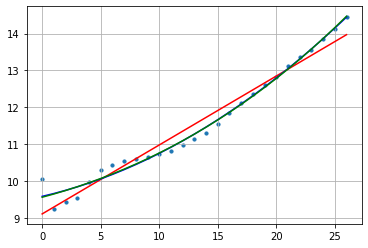

In [23]:
#Una vez obtenidas todas las predicciones, se grafican a modo de ver sus diferencias 
m = 27

x = np.linspace(0, 26, m )
y = data

plt.figure()
plt.scatter(x, y, s=10)
plt.plot(x, y_pred_a, "r")
plt.plot(x, y_pred_b, "b")
plt.plot(x, y_pred_c, "g")
plt.grid()


---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [26]:
#Se importa el archivo 
tabla = pd.read_csv("population_data.csv")

In [27]:
tabla

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [28]:
#Se procede a buscar los resultados referentes a población
poblacion_tabla = tabla["Poblacion"]
poblacion_tabla 

0      28296
1      29110
2      29980
3      30904
4      31880
       ...  
61    115683
62    117054
63    118395
64    119713
65    121005
Name: Poblacion, Length: 66, dtype: int64

In [29]:
#Se convierte en un arreglo 
poblacion_array = np.array ([poblacion_tabla])
poblacion_array 

array([[ 28296,  29110,  29980,  30904,  31880,  32906,  33978,  35095,
         36253,  37448,  38677,  39939,  41234,  42564,  43931,  45339,
         46784,  48264,  49788,  51361,  52988,  54669,  56396,  58156,
         59931,  61708,  63486,  65261,  67013,  68715,  70353,  71916,
         73416,  74880,  76351,  77859,  79410,  80999,  82635,  84327,
         86077,  87890,  89758,  91654,  93542,  95393,  97202,  98969,
        100679, 102317, 103874, 105340, 106724, 108056, 109382, 110732,
        112117, 113530, 114968, 116423, 114255, 115683, 117054, 118395,
        119713, 121005]], dtype=int64)

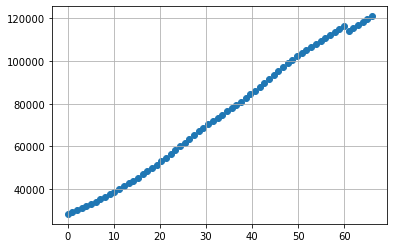

In [30]:
#Se procede a graficar 
m = 66
x = np.linspace(0, 66, m)
y = np.reshape(poblacion_array,[m, -1])
plt.figure()
plt.scatter(x, y)
plt.grid()



In [31]:
#Se hacen las prediciones de ajuste de curva multiplicando (b) (X) de manera matricial (No producto punto)
def funcion_de_poblacion_1(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    y_pred = X @ beta 
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [32]:
#Se realiza la aproximación lineal, por tanto, solo será hasta x**1
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])

X = np.hstack((ones, x_1))
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  1.01538462],
       [ 1.        ,  2.03076923],
       [ 1.        ,  3.04615385],
       [ 1.        ,  4.06153846],
       [ 1.        ,  5.07692308],
       [ 1.        ,  6.09230769],
       [ 1.        ,  7.10769231],
       [ 1.        ,  8.12307692],
       [ 1.        ,  9.13846154],
       [ 1.        , 10.15384615],
       [ 1.        , 11.16923077],
       [ 1.        , 12.18461538],
       [ 1.        , 13.2       ],
       [ 1.        , 14.21538462],
       [ 1.        , 15.23076923],
       [ 1.        , 16.24615385],
       [ 1.        , 17.26153846],
       [ 1.        , 18.27692308],
       [ 1.        , 19.29230769],
       [ 1.        , 20.30769231],
       [ 1.        , 21.32307692],
       [ 1.        , 22.33846154],
       [ 1.        , 23.35384615],
       [ 1.        , 24.36923077],
       [ 1.        , 25.38461538],
       [ 1.        , 26.4       ],
       [ 1.        , 27.41538462],
       [ 1.        ,

In [35]:
beta_inicial = np.random.rand(2)
y = np.reshape(y, [m, -1])


In [36]:
funcion_de_poblacion_1(beta_inicial, X, y)

421816217328.9554

In [37]:
solucion = opt.minimize(funcion_de_poblacion_1, beta_inicial, args=(X, y))
solucion

      fun: 212137169.5445258
 hess_inv: array([[ 8.10504242e-03, -2.03075209e-04],
       [-2.03075209e-04,  1.01710527e-05]])
      jac: array([ 0., -4.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 177
      nit: 9
     njev: 55
   status: 2
  success: False
        x: array([24138.01752333,  1520.57987645])

In [38]:
y_pred_1 = X @ solucion.x
y_pred_1


array([ 24138.01752333,  25681.99093634,  27225.96434936,  28769.93776237,
        30313.91117538,  31857.88458839,  33401.8580014 ,  34945.83141442,
        36489.80482743,  38033.77824044,  39577.75165345,  41121.72506647,
        42665.69847948,  44209.67189249,  45753.6453055 ,  47297.61871852,
        48841.59213153,  50385.56554454,  51929.53895755,  53473.51237056,
        55017.48578358,  56561.45919659,  58105.4326096 ,  59649.40602261,
        61193.37943563,  62737.35284864,  64281.32626165,  65825.29967466,
        67369.27308767,  68913.24650069,  70457.2199137 ,  72001.19332671,
        73545.16673972,  75089.14015274,  76633.11356575,  78177.08697876,
        79721.06039177,  81265.03380478,  82809.0072178 ,  84352.98063081,
        85896.95404382,  87440.92745683,  88984.90086985,  90528.87428286,
        92072.84769587,  93616.82110888,  95160.7945219 ,  96704.76793491,
        98248.74134792,  99792.71476093, 101336.68817394, 102880.66158696,
       104424.63499997, 1

In [47]:
def funcion_de_poblacion_2(beta, X, y) :
    beta = np.reshape(beta, [3, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]
    

In [48]:
#Se realiza una aproximación cuadrática, por tanto, se hace hasta x**2
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])

X = np.hstack((ones, x_1, x_2))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01538462e+00, 1.03100592e+00],
       [1.00000000e+00, 2.03076923e+00, 4.12402367e+00],
       [1.00000000e+00, 3.04615385e+00, 9.27905325e+00],
       [1.00000000e+00, 4.06153846e+00, 1.64960947e+01],
       [1.00000000e+00, 5.07692308e+00, 2.57751479e+01],
       [1.00000000e+00, 6.09230769e+00, 3.71162130e+01],
       [1.00000000e+00, 7.10769231e+00, 5.05192899e+01],
       [1.00000000e+00, 8.12307692e+00, 6.59843787e+01],
       [1.00000000e+00, 9.13846154e+00, 8.35114793e+01],
       [1.00000000e+00, 1.01538462e+01, 1.03100592e+02],
       [1.00000000e+00, 1.11692308e+01, 1.24751716e+02],
       [1.00000000e+00, 1.21846154e+01, 1.48464852e+02],
       [1.00000000e+00, 1.32000000e+01, 1.74240000e+02],
       [1.00000000e+00, 1.42153846e+01, 2.02077160e+02],
       [1.00000000e+00, 1.52307692e+01, 2.31976331e+02],
       [1.00000000e+00, 1.62461538e+01, 2.63937515e+02],
       [1.00000000e+00, 1.72615

In [49]:
beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])


In [50]:
funcion_de_poblacion_2(beta_inicial, X, y)


404287912112.75433

In [51]:
solucion = opt.minimize(funcion_de_poblacion_2, beta_inicial, args=(X, y))
solucion

      fun: 210941621.45700696
 hess_inv: array([[ 2.05667804e-04,  2.01431620e-04, -3.83197583e-06],
       [ 2.01431620e-04,  2.00661028e-04, -3.81733962e-06],
       [-3.83197583e-06, -3.81733962e-06,  7.44387465e-08]])
      jac: array([0., 0., 4.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 303
      nit: 16
     njev: 73
   status: 2
  success: False
        x: array([2.44255535e+04, 1.49403065e+03, 4.02266151e-01])

In [52]:
y_pred_2 = X @ solucion.x
y_pred_2


array([ 24425.55345711,  25942.98392871,  27461.24387787,  28980.33330459,
        30500.25220888,  32021.00059073,  33542.57845014,  35064.98578712,
        36588.22260166,  38112.28889376,  39637.18466343,  41162.90991066,
        42689.46463546,  44216.84883782,  45745.06251774,  47274.10567522,
        48803.97831027,  50334.68042288,  51866.21201306,  53398.5730808 ,
        54931.7636261 ,  56465.78364897,  58000.6331494 ,  59536.31212739,
        61072.82058295,  62610.15851607,  64148.32592675,  65687.322815  ,
        67227.14918081,  68767.80502419,  70309.29034512,  71851.60514363,
        73394.74941969,  74938.72317332,  76483.52640451,  78029.15911327,
        79575.62129959,  81122.91296347,  82671.03410492,  84219.98472393,
        85769.7648205 ,  87320.37439464,  88871.81344634,  90424.0819756 ,
        91977.17998243,  93531.10746682,  95085.86442877,  96641.45086829,
        98197.86678537,  99755.11218002, 101313.18705222, 102872.091402  ,
       104431.82522933, 1

In [60]:
def funcion_de_poblacion_3(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    y_pred = X @ beta 
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [61]:
#Se realiza una aproximación cúbica, por tanto, se hace hasta x**3
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])

X = np.hstack((ones, x_1, x_2, x_3))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01538462e+00, 1.03100592e+00, 1.04686755e+00],
       [1.00000000e+00, 2.03076923e+00, 4.12402367e+00, 8.37494037e+00],
       [1.00000000e+00, 3.04615385e+00, 9.27905325e+00, 2.82654238e+01],
       [1.00000000e+00, 4.06153846e+00, 1.64960947e+01, 6.69995230e+01],
       [1.00000000e+00, 5.07692308e+00, 2.57751479e+01, 1.30858443e+02],
       [1.00000000e+00, 6.09230769e+00, 3.71162130e+01, 2.26123390e+02],
       [1.00000000e+00, 7.10769231e+00, 5.05192899e+01, 3.59075569e+02],
       [1.00000000e+00, 8.12307692e+00, 6.59843787e+01, 5.35996184e+02],
       [1.00000000e+00, 9.13846154e+00, 8.35114793e+01, 7.63166442e+02],
       [1.00000000e+00, 1.01538462e+01, 1.03100592e+02, 1.04686755e+03],
       [1.00000000e+00, 1.11692308e+01, 1.24751716e+02, 1.39338070e+03],
       [1.00000000e+00, 1.21846154e+01, 1.48464852e+02, 1.80898712e+03],
       [1.00000000e+00, 1.32000000e+01, 1.74240000e

In [62]:
beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])


In [63]:
funcion_de_poblacion_3(beta_inicial, X, y)


157829798340.23676

In [64]:
solucion = opt.minimize(funcion_de_poblacion_3, beta_inicial, args=(X, y))
solucion


      fun: 25240442.63313161
 hess_inv: array([[ 1.09989353e-01, -1.23286558e-02,  3.69670764e-04,
        -3.23699444e-06],
       [-1.23286558e-02,  1.89245038e-03, -6.44707602e-05,
         6.05324727e-07],
       [ 3.69670764e-04, -6.44707602e-05,  2.35202066e-06,
        -2.30534055e-08],
       [-3.23699444e-06,  6.05324727e-07, -2.30534055e-08,
         2.32694396e-10]])
      jac: array([ 0.  , -0.75, -0.5 , -5.  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 195
      nit: 7
     njev: 37
   status: 2
  success: False
        x: array([ 2.84777452e+04,  7.27883621e+02,  2.96455818e+01, -2.95386800e-01])

In [65]:
y_pred_3 = X @ solucion.x
y_pred_3

array([ 28477.74522834,  29247.08259863,  30075.69412437,  30961.72442044,
        31903.31810171,  32898.61978306,  33945.77407936,  35042.92560547,
        36188.21897628,  37379.79880667,  38615.80971149,  39894.39630563,
        41213.70320396,  42571.87502135,  43967.05637268,  45397.39187282,
        46861.02613665,  48356.10377903,  49880.76941484,  51433.16765895,
        53011.44312625,  54613.74043159,  56238.20418986,  57882.97901593,
        59546.20952467,  61226.04033095,  62920.61604966,  64628.08129565,
        66346.58068381,  68074.25882901,  69809.26034613,  71549.72985003,
        73293.81195559,  75039.65127768,  76785.39243118,  78529.18003096,
        80269.15869189,  82003.47302886,  83730.26765672,  85447.68719036,
        87153.87624464,  88846.97943445,  90525.14137465,  92186.50668012,
        93829.21996573,  95451.42584636,  97051.26893687,  98626.89385215,
       100176.44520707, 101698.06761649, 103189.9056953 , 104650.10405836,
       106076.80732056, 1

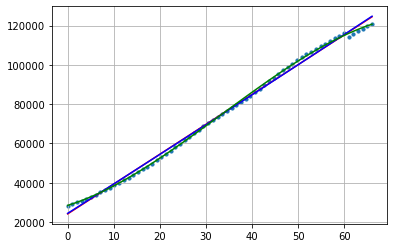

In [66]:
#Se procede a graficar los resultados 
m = 66
x = np.linspace(0, 66, m)
y = np.reshape(poblacion_array,[m, -1])
plt.figure()
plt.scatter(x, y, s = 10)
plt.plot(x, y_pred_1, "r")
plt.plot(x, y_pred_2, "b")
plt.plot(x, y_pred_3, "g")
plt.grid()


In [67]:
#Ahora, se tomarán los datos referentes a nacimientos 
nacimientos_tabla = tabla["Nacimientos"]
nacimientos_tabla 

0     1174947
1     1183788
2     1195209
3     1261775
4     1339837
       ...   
61    2586287
62    2498880
63    2478889
64    2463420
65    2353596
Name: Nacimientos, Length: 66, dtype: int64

In [68]:
#Se convierten en un arreglo 
nacimientos_array = np.array([nacimientos_tabla])
nacimientos_array 

array([[1174947, 1183788, 1195209, 1261775, 1339837, 1377917, 1427722,
        1485202, 1447578, 1589606, 1608174, 1647006, 1705481, 1756624,
        1849408, 1888171, 1954340, 1981363, 2058251, 2037561, 2132630,
        2231399, 2346002, 2572287, 2522580, 2254497, 2366305, 2379327,
        2346862, 2274267, 2446238, 2530662, 2392849, 2609088, 2511894,
        2655671, 2577045, 2794390, 2622031, 2620262, 2735312, 2756447,
        2797397, 2839686, 2904389, 2750444, 2707718, 2698425, 2668429,
        2769089, 2798339, 2767610, 2699084, 2655894, 2625056, 2567906,
        2505939, 2655083, 2636110, 2577214, 2643908, 2586287, 2498880,
        2478889, 2463420, 2353596]], dtype=int64)

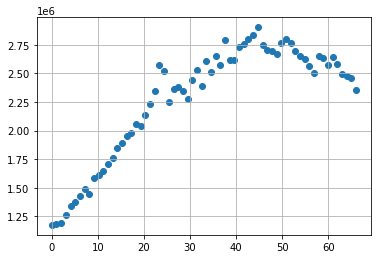

In [69]:
#Se procede a graficar 
m = 66
x = np.linspace(0, 66, m)
y = np.reshape(nacimientos_array,[m, -1])
plt.figure()
plt.scatter(x, y)
plt.grid()

In [70]:
def funcion_de_nacimientos_1(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [71]:
#Se realiza una aproximación lineal, por tanto, se hace hasta x**1
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])

X = np.hstack((ones, x_1))
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  1.01538462],
       [ 1.        ,  2.03076923],
       [ 1.        ,  3.04615385],
       [ 1.        ,  4.06153846],
       [ 1.        ,  5.07692308],
       [ 1.        ,  6.09230769],
       [ 1.        ,  7.10769231],
       [ 1.        ,  8.12307692],
       [ 1.        ,  9.13846154],
       [ 1.        , 10.15384615],
       [ 1.        , 11.16923077],
       [ 1.        , 12.18461538],
       [ 1.        , 13.2       ],
       [ 1.        , 14.21538462],
       [ 1.        , 15.23076923],
       [ 1.        , 16.24615385],
       [ 1.        , 17.26153846],
       [ 1.        , 18.27692308],
       [ 1.        , 19.29230769],
       [ 1.        , 20.30769231],
       [ 1.        , 21.32307692],
       [ 1.        , 22.33846154],
       [ 1.        , 23.35384615],
       [ 1.        , 24.36923077],
       [ 1.        , 25.38461538],
       [ 1.        , 26.4       ],
       [ 1.        , 27.41538462],
       [ 1.        ,

In [73]:
beta_inicial = np.random.rand(2)
y = np.reshape(y, [m, -1])

In [74]:
funcion_de_nacimientos_1(beta_inicial, X, y)

358562377191943.0

In [75]:
solucion = opt.minimize(funcion_de_nacimientos_1, beta_inicial, args=(X, y))
solucion

      fun: 4737912686467.055
 hess_inv: array([[ 5.34945788e-03, -1.20742286e-04],
       [-1.20742286e-04,  7.90283720e-06]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 93
      nit: 8
     njev: 31
   status: 0
  success: True
        x: array([1562838.39325872,   21646.3541705 ])

In [76]:
y_pred_1 = X @ solucion.x
y_pred_1

array([1562838.39325872, 1584817.76826261, 1606797.1432665 ,
       1628776.51827039, 1650755.89327428, 1672735.26827817,
       1694714.64328206, 1716694.01828595, 1738673.39328984,
       1760652.76829373, 1782632.14329762, 1804611.51830151,
       1826590.8933054 , 1848570.26830929, 1870549.64331318,
       1892529.01831707, 1914508.39332097, 1936487.76832486,
       1958467.14332875, 1980446.51833264, 2002425.89333653,
       2024405.26834042, 2046384.64334431, 2068364.0183482 ,
       2090343.39335209, 2112322.76835598, 2134302.14335987,
       2156281.51836376, 2178260.89336765, 2200240.26837154,
       2222219.64337543, 2244199.01837932, 2266178.39338322,
       2288157.76838711, 2310137.143391  , 2332116.51839489,
       2354095.89339878, 2376075.26840267, 2398054.64340656,
       2420034.01841045, 2442013.39341434, 2463992.76841823,
       2485972.14342212, 2507951.51842601, 2529930.8934299 ,
       2551910.26843379, 2573889.64343768, 2595869.01844157,
       2617848.39344546,

In [77]:
def funcion_de_nacimientos_2(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [79]:
#Se realiza una aproximación cuadrática, por tanto, se hace hasta x**2
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])

X = np.hstack((ones, x_1, x_2))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01538462e+00, 1.03100592e+00],
       [1.00000000e+00, 2.03076923e+00, 4.12402367e+00],
       [1.00000000e+00, 3.04615385e+00, 9.27905325e+00],
       [1.00000000e+00, 4.06153846e+00, 1.64960947e+01],
       [1.00000000e+00, 5.07692308e+00, 2.57751479e+01],
       [1.00000000e+00, 6.09230769e+00, 3.71162130e+01],
       [1.00000000e+00, 7.10769231e+00, 5.05192899e+01],
       [1.00000000e+00, 8.12307692e+00, 6.59843787e+01],
       [1.00000000e+00, 9.13846154e+00, 8.35114793e+01],
       [1.00000000e+00, 1.01538462e+01, 1.03100592e+02],
       [1.00000000e+00, 1.11692308e+01, 1.24751716e+02],
       [1.00000000e+00, 1.21846154e+01, 1.48464852e+02],
       [1.00000000e+00, 1.32000000e+01, 1.74240000e+02],
       [1.00000000e+00, 1.42153846e+01, 2.02077160e+02],
       [1.00000000e+00, 1.52307692e+01, 2.31976331e+02],
       [1.00000000e+00, 1.62461538e+01, 2.63937515e+02],
       [1.00000000e+00, 1.72615

In [82]:
beta_inicial = np.random.rand(3)

In [83]:
funcion_de_nacimientos_2(beta_inicial, X, y)

358491021774819.25

In [84]:
solucion = opt.minimize(funcion_de_nacimientos_2, beta_inicial, args=(X, y))
solucion

      fun: 492921048975.0791
 hess_inv: array([[ 1.11832455e-02, -3.34916959e-06, -2.85015939e-06],
       [-3.34916959e-06,  2.04792874e-07, -2.78332058e-09],
       [-2.85015939e-06, -2.78332058e-09,  2.62804688e-09]])
      jac: array([     0., -12288., -90112.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 280
      nit: 12
     njev: 67
   status: 2
  success: False
        x: array([ 1.02110640e+06,  7.16753467e+04, -7.58059574e+02])

In [85]:
y_pred_2 = X @ solucion.x
y_pred_2

array([1021106.39891041, 1093102.87933754, 1163536.23195289,
       1232406.45675648, 1299713.5537483 , 1365457.52292835,
       1429638.36429664, 1492256.07785315, 1553310.6635979 ,
       1612802.12153088, 1670730.45165209, 1727095.65396153,
       1781897.72845921, 1835136.67514511, 1886812.49401925,
       1936925.18508162, 1985474.74833222, 2032461.18377105,
       2077884.49139812, 2121744.67121341, 2164041.72321694,
       2204775.6474087 , 2243946.44378869, 2281554.11235692,
       2317598.65311337, 2352080.06605806, 2384998.35119098,
       2416353.50851213, 2446145.53802151, 2474374.43971912,
       2501040.21360497, 2526142.85967905, 2549682.37794135,
       2571658.7683919 , 2592072.03103067, 2610922.16585767,
       2628209.17287291, 2643933.05207638, 2658093.80346807,
       2670691.42704801, 2681725.92281617, 2691197.29077256,
       2699105.53091719, 2705450.64325005, 2710232.62777114,
       2713451.48448046, 2715107.21337801, 2715199.8144638 ,
       2713729.28773781,

In [86]:
def funcion_de_nacimientos_3(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    y_pred = X @ beta
    return ((y - y_pred).T @ (y - y_pred))[0][0]

In [88]:
#Se realiza una aproximación cúbica, por tanto, se hace hasta x**3
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])

X = np.hstack((ones, x_1, x_2, x_3))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01538462e+00, 1.03100592e+00, 1.04686755e+00],
       [1.00000000e+00, 2.03076923e+00, 4.12402367e+00, 8.37494037e+00],
       [1.00000000e+00, 3.04615385e+00, 9.27905325e+00, 2.82654238e+01],
       [1.00000000e+00, 4.06153846e+00, 1.64960947e+01, 6.69995230e+01],
       [1.00000000e+00, 5.07692308e+00, 2.57751479e+01, 1.30858443e+02],
       [1.00000000e+00, 6.09230769e+00, 3.71162130e+01, 2.26123390e+02],
       [1.00000000e+00, 7.10769231e+00, 5.05192899e+01, 3.59075569e+02],
       [1.00000000e+00, 8.12307692e+00, 6.59843787e+01, 5.35996184e+02],
       [1.00000000e+00, 9.13846154e+00, 8.35114793e+01, 7.63166442e+02],
       [1.00000000e+00, 1.01538462e+01, 1.03100592e+02, 1.04686755e+03],
       [1.00000000e+00, 1.11692308e+01, 1.24751716e+02, 1.39338070e+03],
       [1.00000000e+00, 1.21846154e+01, 1.48464852e+02, 1.80898712e+03],
       [1.00000000e+00, 1.32000000e+01, 1.74240000e

In [89]:
beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])


In [90]:
funcion_de_nacimientos_3(beta_inicial, X, y)

352774685532295.44

In [91]:
solucion = opt.minimize(funcion_de_nacimientos_3, beta_inicial, args=(X, y))
solucion


      fun: 441782322594.38367
 hess_inv: array([[ 9.27139674e-03, -1.92858809e-03,  7.38977915e-05,
        -6.84910706e-07],
       [-1.92858809e-03,  4.01256220e-04, -1.54523159e-05,
         1.43811115e-07],
       [ 7.38977915e-05, -1.54523159e-05,  6.68686856e-07,
        -6.78458162e-09],
       [-6.84910706e-07,  1.43811115e-07, -6.78458162e-09,
         7.39866774e-11]])
      jac: array([ 0.0000000e+00, -8.1920000e+03, -2.0480000e+05, -1.0067968e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 275
      nit: 10
     njev: 54
   status: 2
  success: False
        x: array([ 1.08838060e+06,  5.89579983e+04, -2.72673716e+02, -4.90275269e+00])

In [92]:
y_pred_3 = X @ solucion.x
y_pred_3

array([1088380.59820209, 1147959.38187761, 1206945.11392782,
       1265306.99915665, 1323014.24236803, 1380036.0483659 ,
       1436341.62195419, 1491900.16793685, 1546680.89111781,
       1600652.996301  , 1653785.68829035, 1706048.17188982,
       1757409.65190332, 1807839.33313481, 1857306.4203882 ,
       1905780.11846745, 1953229.63217648, 1999624.16631923,
       2044932.92569964, 2089125.11512164, 2132169.93938917,
       2174036.60330616, 2214694.31167655, 2254112.26930428,
       2292259.68099329, 2329105.7515475 , 2364619.68577086,
       2398770.68846729, 2431527.96444074, 2462860.71849515,
       2492738.15543444, 2521129.48006255, 2548003.89718343,
       2573330.611601  , 2597078.8281192 , 2619217.75154197,
       2639716.58667325, 2658544.53831696, 2675670.81127705,
       2691064.61035745, 2704695.14036209, 2716531.60609492,
       2726543.21235987, 2734699.16396087, 2740968.66570187,
       2745320.92238679, 2747725.13881957, 2748150.51980415,
       2746566.27014447,

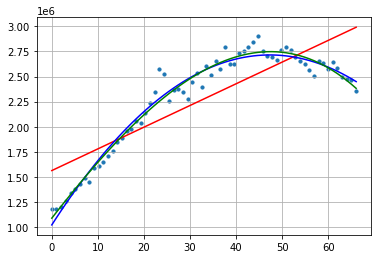

In [93]:
#Se grafican todos los resultados a modo de diferenciarlos 
m = 66
x = np.linspace(0, 66, m)
y = np.reshape(nacimientos_array,[m, -1])
plt.figure()
plt.scatter(x, y, s = 10)
plt.plot(x, y_pred_1, "r")
plt.plot(x, y_pred_2, "b")
plt.plot(x, y_pred_3, "g")
plt.grid()
